In [4]:
import matplotlib.pyplot as plt
import numpy as np

def convolution(gray,conv_filter):
    pad = conv_filter.shape[0]
    dimensions = gray.shape
    print gray.shape
    convolution = np.zeros(dimensions)
    print dimensions
    for i in range(0,dimensions[0]-pad):
        for j in range(0,dimensions[1]-pad):
            convolution[[i+1],[j+1]]  = np.sum(np.dot(conv_filter, gray[i:i+pad,j:j+pad]))  
    return convolution

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def get_gradient(gx,gy):
    gx_sq =np.square(gx)
    gy_sq = np.square(gy)
    gradient_sq = np.add(gx_sq, gy_sq )
    return np.sqrt(gradient_sq.astype('float64'))


def get_gradient_slope(gx,gy):
    div = np.divide(gy,gx)
    return np.arctan(div)

def sobel_filter(gray):
    sobel_filter_gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    sobel_filter_gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    sobel_gx = convolution(gray,sobel_filter_gx)
    sobel_gy = convolution(gray,sobel_filter_gy)
    edges = get_gradient(sobel_gx,sobel_gy)    
    slope = get_gradient_slope(sobel_gx,sobel_gy)
    return slope,edges, np.absolute(sobel_gx).astype('int8') , np.absolute(sobel_gy)


def robert_filter(gray):
    robert_filter_gx = np.array([[1,0],[0,-1]])
    robert_filter_gy = np.array([[0,1],[-1,0]])
    robert_gx = convolution(gray,robert_filter_gx)
    robert_gy = convolution(gray,robert_filter_gy)
    edges = get_gradient(sobel_gx,sobel_gy)    
    slope = get_gradient_slope(sobel_gx,sobel_gy)
    return slope,edges, np.absolute(sobel_gx).astype('int8') , np.absolute(sobel_gy)
    
    
img =plt.imread('./ball_1.jpg',1)
# print img.shape
gray = rgb2gray(img)
sobel = sobel_filter(gray)




(256, 256)
(256, 256)
(256, 256)
(256, 256)


/home/rikith/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in divide
/home/rikith/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide


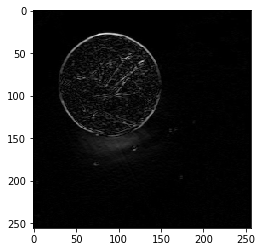

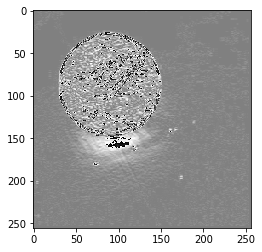

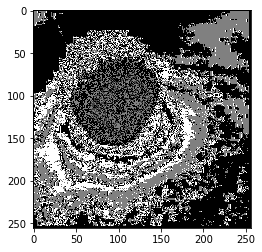

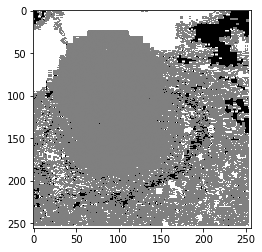

In [5]:
plt.imshow (sobel[1],cmap='gray')
plt.show()
plt.imshow (sobel[2],cmap='gray')
plt.show()
plt.imshow (sobel[3],cmap='gray')
plt.show()
plt.imshow (sobel[0],cmap='gray')
plt.show()


In [1]:
from os import listdir
path = '../data/hard/'
output_path = '../output_sobel/hard/'

directories = listdir(path)


for directory in directories:
    list_path = path+directory
    if directory[0]=='.':
        continue        
    files_dir = listdir(list_path)
    for file in files_dir:
            if file[0]=='.':
                continue
            file_path  = list_path+'/'+file
            print file_path
            img =plt.imread(file_path,1)
            gray = rgb2gray(img)
            sobel = sobel_filter(gray)

            

            plt.imsave( output_path+file.split('.')[0]+'.png' ,sobel[1],cmap = 'gray' )




# file_path = '../data/easy/brick/brick_2.jpg'
# img =plt.imread(file_path,1)
# gray = rgb2gray(img)
# sobel = sobel_edge(gray)
# sobel[1] 

# np.reshape(sobel[1], (sobel[1].shape[0],sobel[1].shape[1],1))


OSError: [Errno 2] No such file or directory: '../data/hard/'